The following two exercices are taken from: http://www.real-statistics.com/students-t-distribution/one-sample-t-test/

__Exercice 1:__ A weight reduction program claims to be effective in treating obesity. To test this claim 12 people were put on the program and the number of pounds of weight gain/loss was recorded for each person after two years, as shown in columns A and B of Figure 1. Can we conclude that the program is effective?

| Subject | Weight loss |
|---------|-------------|
| 1       | 23          |
| 2       | 15          |
| 3       | -5          |
| 4       | 7           |
| 5       | 1           |
| 6       | -10         |
| 7       | 12          |
| 8       | -8          |
| 9       | 20          |
| 10      | 8           |
| 11      | -2          |
| 12      | -5          |

[1] 12

[1] 4.666667

[1] 11.15456

[1] 3.220045

[1] 1.449255

[1] 1.795885

[1] 0.08758473


	One Sample t-test

data:  sample
t = 1.4493, df = 11, p-value = 0.08758
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -1.116162       Inf
sample estimates:
mean of x 
 4.666667 


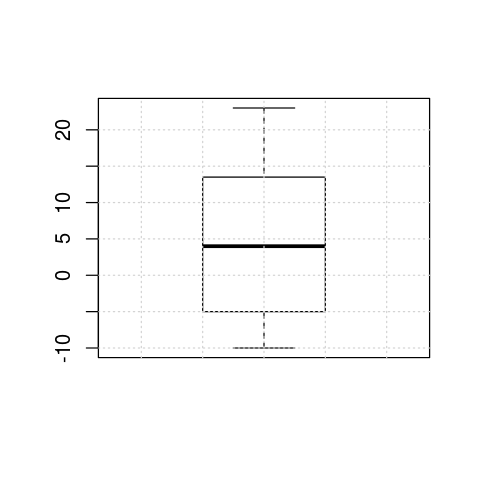

In [20]:
sample = c(23, 15, -5, 7, 1, -10, 12, -8, 20, 8, -2, -5)

n = length(sample)
m = mean(sample)
sigma = sd(sample)
err = sigma/sqrt(n)
n
m
sigma
err
mu = 0
t = (m-mu)/err
t
alpha = 0.05
tcrit = qt(1-alpha, n-1)
tcrit
pvalue = 1 - pt(t, n-1)
pvalue

# Or use right away the redefined R functionalities
t.test(sample, mu=0, alternative="greater")

# Empirical verifications of assumptions
options(repr.plot.width=4, repr.plot.height=4)
boxplot(sample)
grid()

Conclusion: the weight loss is, at the 95% CL, not different from 0.

__Exercice 2:__ A school board wanted to see if reading test scores have changed in the past 30 years by testing a random sample of 40 students to see whether there is a significant change from the average score of 78 thirty years ago. The scores of the sample are as follows:

|    |    |    |    |
|----|----|----|----|
| 63 | 58 | 76 | 59 |
| 95 | 84 | 83 | 68 |
| 81 | 90 | 87 | 45 |
| 75 | 38 | 54 | 52 |
| 90 | 100 | 45 | 76 | 
| 64 | 80 | 58 | 78 | 
| 45 | 68 | 64 | 50 |
| 59 | 49 | 63 | 75 | 
| 72 | 68 | 92 | 64 |
| 35 | 60 | 87 | 86 |

Based on this data, can we claim that the reading scores have changed in the past 30 years? (This time we perform a two-sided test)

[1] -3.663928

[1] 0.0007371026

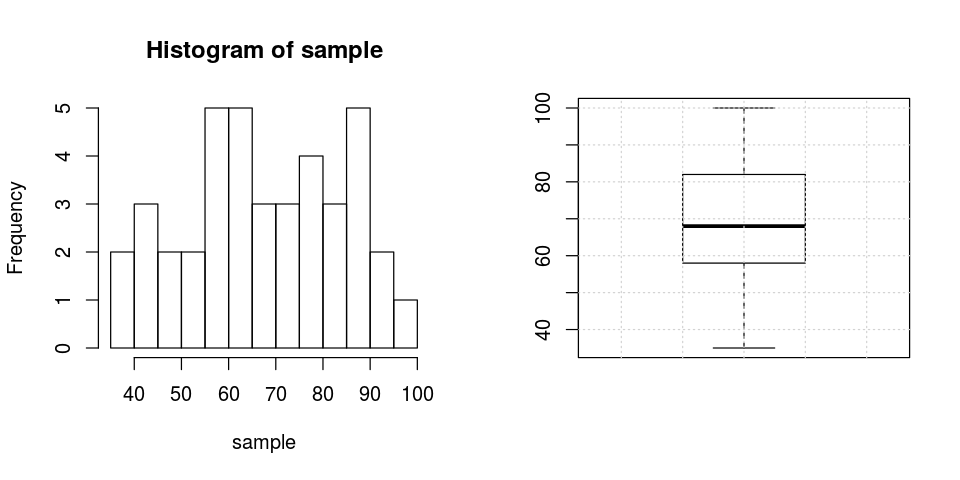

In [7]:
sample = c(63, 58, 76, 59,
           95, 84, 83, 68,
           81, 90, 87, 45,
           75, 38, 54, 52,
           90, 100, 45, 76, 
           64, 80, 58, 78, 
           45, 68, 64, 50,
           59, 49, 63, 75, 
           72, 68, 92, 64,
           35, 60, 87, 86)
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow = c(1, 2))
hist(sample, breaks=20)
boxplot(sample)
grid()

n = length(sample)
t = (mean(sample) - 78)/(sd(sample)/sqrt(n))
t
pvalue = pt(t, n-1)*2 # probability on left-side tail, as the observed value of the test is negative
pvalue

Warning message:
“Removed 378 rows containing non-finite values (stat_bin).”

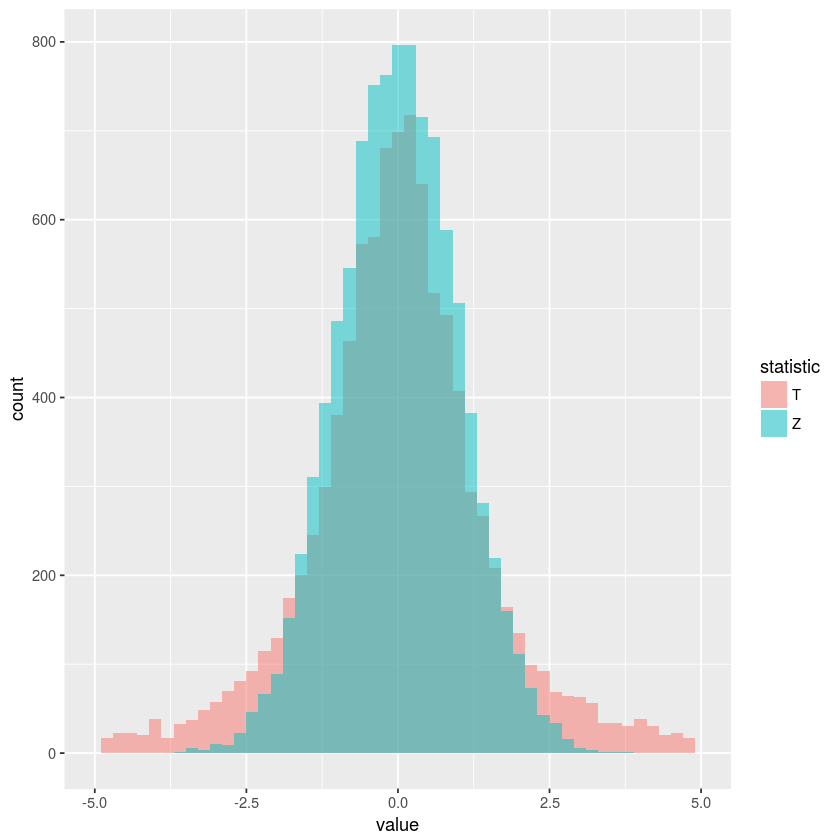

In [2]:
library(ggplot2)
mu.x = 100  # population value
sd.x = 15   # population value
n = 3       # small sample size to highlight t distribution tails
sample.n = function(n){rnorm(n, mu.x, sd.x)}
calculate.t = function(x){(mean(x) - mu.x)/(sd(x)/sqrt(length(x)))} # uses sample sd
calculate.z = function(x){(mean(x) - mu.x)/(sd.x /sqrt(length(x)))} # uses population sd

sample.ts = replicate(10000, calculate.t(sample.n(n)))
sample.zs = replicate(10000, calculate.z(sample.n(n)))

df = rbind(data.frame(value=sample.ts, statistic="T"),
           data.frame(value=sample.zs, statistic="Z"))

ggplot(df, aes(x=value, fill=statistic))+
  geom_histogram(position="identity", binwidth=0.2, alpha=0.5)+
  scale_x_continuous(limits=c(-5,5))